In [1]:
using Pkg 
Pkg.activate("..")

  Activating project at `~/code/PhasorNetworks.jl`


In [ ]:
include("../src/PhasorNetworks.jl")
using .PhasorNetworks, Plots, DifferentialEquations

In [ ]:
using Lux, MLUtils, MLDatasets, OneHotArrays, Statistics, Test, LuxCUDA
using Random: Xoshiro, AbstractRNG
using Base: @kwdef
using Zygote: withgradient
using Optimisers, ComponentArrays
using Statistics: mean
using LinearAlgebra: diag
using PhasorNetworks: bind
using Distributions: Normal
using DifferentialEquations: Heun, Tsit5

[ Info: Precompiling PhasorNetworks [c32d742c-e486-48f1-8804-9f6fb4d3f42c] (cache misses: include_dependency fsize change (2), mismatched flags (16))


In [ ]:
rng = Xoshiro(42)

Xoshiro(0xa379de7eeeb2a4e8, 0x953dccb6b532b3af, 0xf597b8ff8cfd652a, 0xccd7337c571680d1, 0xc90c4a0730db3f7e)

In [ ]:
cdev = cpu_device()
gdev = gpu_device()

(::CUDADevice{Nothing}) (generic function with 1 method)

In [ ]:
include("../test/data.jl")

generate_pattern_dataset (generic function with 1 method)

In [ ]:
copy_data = generate_copy_dataset(rng);

In [ ]:
cb = generate_codebook(rng);

In [ ]:
copy_hd = map_symbols(copy_data, cb);

In [ ]:
using MLUtils: BatchView

In [ ]:
train_set = BatchView(copy_hd, batchsize= 32)

BatchView([([-0.30386245250701904 -0.7701548337936401 … 0.0 0.0; 0.5847015380859375 -0.898206353187561 … 0.0 0.0; … ; 0.09862661361694336 0.0760115385055542 … 0.0 0.0; 0.5465637445449829 -0.6703484058380127 … 0.0 0.0], [-0.30386245250701904 -0.7701548337936401 … 0.0 0.0; 0.5847015380859375 -0.898206353187561 … 0.0 0.0; … ; 0.09862661361694336 0.0760115385055542 … 0.0 0.0; 0.5465637445449829 -0.6703484058380127 … 0.0 0.0]), ([0.9101718664169312 0.07211911678314209 … 0.0 0.0; -0.6243523359298706 0.012085318565368652 … 0.0 0.0; … ; -0.8645673990249634 0.5022938251495361 … 0.0 0.0; 0.44196271896362305 -0.8277769088745117 … 0.0 0.0], [0.9101718664169312 0.07211911678314209 … 0.0 0.0; -0.6243523359298706 0.012085318565368652 … 0.0 0.0; … ; -0.8645673990249634 0.5022938251495361 … 0.0 0.0; 0.44196271896362305 -0.8277769088745117 … 0.0 0.0]), ([0.43601012229919434 -0.6342048645019531 … 0.0 0.0; 0.7579816579818726 -0.2007763385772705 … 0.0 0.0; … ; 0.4670447111129761 -0.532899022102356 … 0.0 0.

In [ ]:
b = first(train_set) |> stack;

In [ ]:
size(b)

(2, 32)

In [ ]:
x = b[1,:] |> stack
y = b[2,:] |> stack;

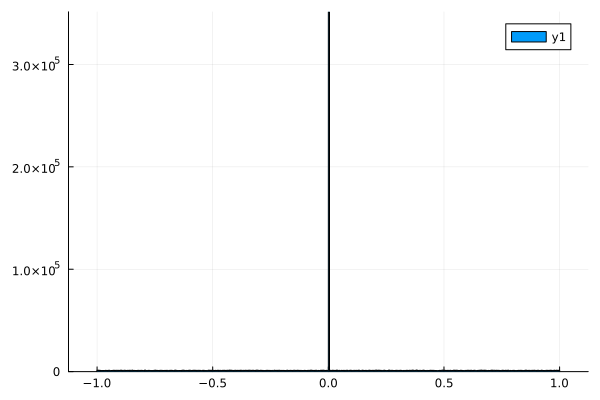

In [ ]:
histogram(vec(x))

In [ ]:
size(x)

(512, 50, 32)

In [ ]:
size(y)

(512, 50, 32)

In [ ]:
l = PhasorAttention(3.0f0)

PhasorAttention(3.0f0)  # 1 parameters

In [ ]:
ps, st = Lux.setup(rng, l)

((scale = Float32[3.0],), NamedTuple())

In [ ]:
typeof(ps)

@NamedTuple{scale::Vector{Float32}}

In [ ]:
yh, _ = l(x, x, x, ps, st)

([-0.0950620988141172 -0.12167625605929018 … -0.0007194870074096687 -0.0007194870074096687; 0.1340817470360888 -0.04297504047306424 … 0.0005207139954589069 0.0005207139954589069; … ; 0.02290470914806623 0.015140869073667351 … -0.00024596979621878824 -0.00024596979621878824; 0.12016443624294547 -0.11985576432804 … -0.0002605435405077425 -0.0002605435405077425;;; -0.8222781820543329 -0.0690055352453485 … -0.01835588942357869 -0.01835588942357869; -0.45828096165630383 0.03313279651608026 … 0.005594635813535467 0.005594635813535467; … ; -0.3568896302895737 0.23616887379781737 … -0.00013750084574358303 -0.00013750084574358303; 0.2945045334174834 -0.7115822411293801 … -0.0028788006345912397 -0.0028788006345912397;;; 0.2731252303835455 -0.5258936945574949 … -0.04573520052670501 -0.04573520052670501; 0.5409857104948113 -0.040727856886584854 … 0.062095175093065405 0.062095175093065405; … ; 0.334848439475015 -0.3893909892977119 … 0.006009159974595021 0.006009159974595021; -0.324964079933672 0.41

In [ ]:
yh[1] |> size

()

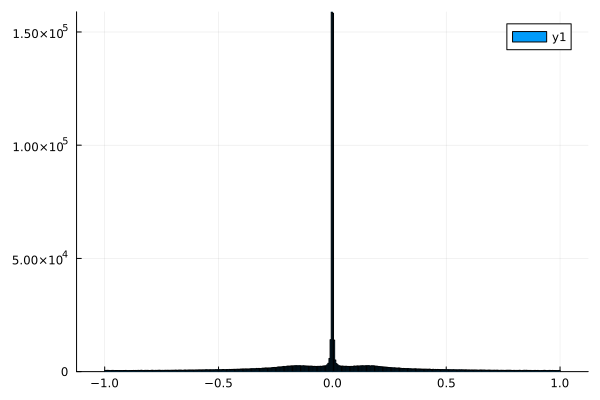

In [ ]:
histogram(yh |> vec)

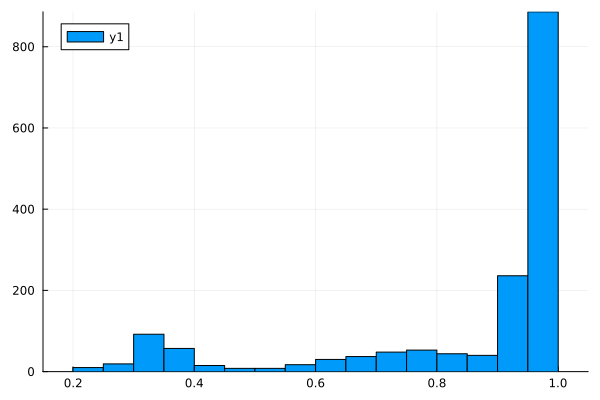

In [ ]:
histogram(vec(similarity(yh, x)))